6
2
29.66080904006958 seconds


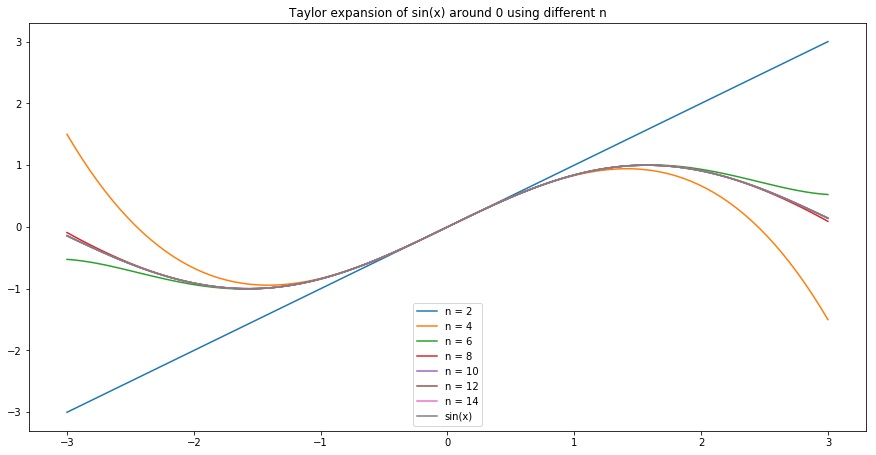

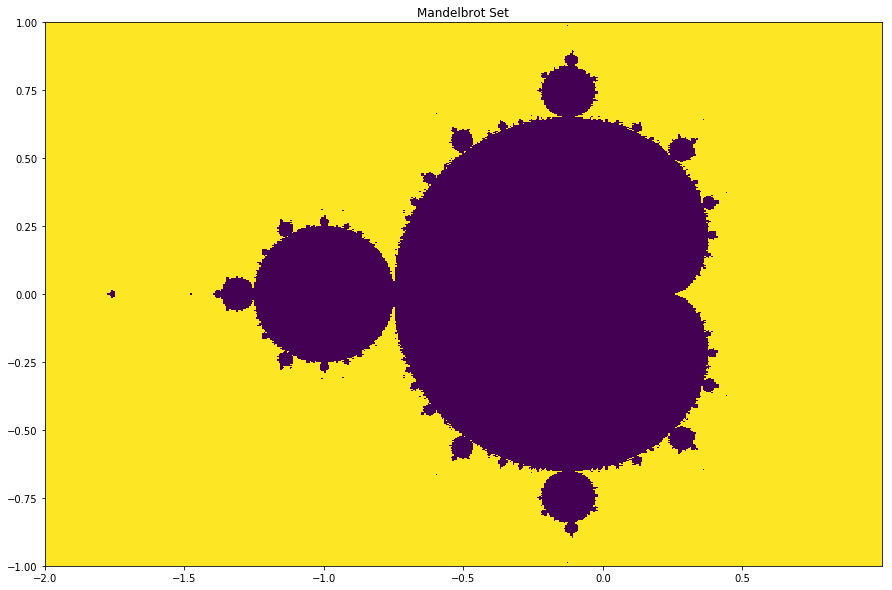

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

def dn_sin(n):
	'''
	Compute the n^th derivative of sin(x) at x=0

	input:
		n - int: the order of the derivative to compute
	output:
		float nth derivative of sin(0)
	'''
    y = 0
    reminder = n%4
    if reminder == 0:
        y = np.sin(0)
    elif reminder == 1:
        y = np.cos(0)
    elif reminder == 2:
        y = -1*np.sin(0)
    else:
        y = -1*np.cos(0)   
    return y

def taylor_sin(x, n):
	'''
	Evaluate the Taylor series of sin(x) about x=0 neglecting terms of order x^n
	
	input:
		x - float: argument of sin
		n - int: number of terms of the taylor series to use in approximation
	output:
		float value computed using the taylor series truncated at the nth term
	'''
    y = 0
    for i in range(int(n)):
        y_new = (dn_sin(i)*x**i) / math.factorial(i)
        y = y+y_new
        
    return y

def measure_diff(ary1, ary2):
	'''
	Compute a scalar measure of difference between 2 arrays

	input:
		ary1 - numpy array of float values
		ary2 - numpy array of float values
	output:
		a float scalar quantifying difference between the arrays
	'''
    y = 0
    y_ = ary1-ary2
    y = np.sum(np.absolute(y_))
    return y


def escape(cx, cy, dist,itrs, x0=0, y0=0):
	'''
	Compute the number of iterations of the logistic map, 
	f(x+j*y)=(x+j*y)**2 + cx +j*cy with initial values x0 and y0 
	with default values of 0, to escape from a cirle centered at the origin.

	inputs:
		cx - float: the real component of the parameter value
		cy - float: the imag component of the parameter value
		dist: radius of the circle
		itrs: int max number of iterations to compute
		x0: initial value of x; default value 0
		y0: initial value of y; default value 0
	returns:
		an int scalar interation count
	'''
    x_old = x0
    y_old = y0
    radius = (x_old**2+y_old**2)**0.5
    for i in range(itrs):
        radius = (x_old**2+y_old**2)**0.5
        if radius < dist:
            x_new = x_old**2-y_old**2+cx
            y_new = 2*x_old*y_old+cy
            x_old = x_new
            y_old = y_new
        else:
            return i
    
    return 0

def mandelbrot(cx,cy,dist,itrs):
	'''
	Compute escape iteration counts for an array of parameter values

	input:
		cx - array: 1d array of real part of parameter
		cy - array: 1d array of imaginary part of parameter
		dist - float: radius of circle for escape
		itrs - int: maximum number of iterations to compute
	output:
		a 2d array of iteration count for each parameter value (indexed pair of values cx, cy)
	'''
    y_ = np.zeros((len(cx),len(cy)))
    for i in range(len(cx)):
        for j in range(len(cy)):
            y_[j][i] = escape(cx[i],cy[j],dist,itrs)
            
    return y_

if __name__ == '__main__':

    #Problem 2/3
    x_ = np.linspace(-3,3,101)
    y_ = np.zeros((8,101))
    
    for n in range(2,16,2):
        
        #compute taylor series
        for j in range(len(x_)):
            x = x_[j]
            y_[int(n/2)][j] = taylor_sin(x,n)
        
        #plot taylor series
    fig = plt.figure(figsize = (15,7.5))
    for n in range(2,16,2):
        text = "n = " + str(int(n))
        plt.plot(x_,y_[int(n/2)], label = text)

    plt.plot(x_,np.sin(x_), label = "sin(x)")
    plt.title("Taylor expansion of sin(x) around 0 using different n")
    plt.legend()
    
    #Problem 4
    pi = math.pi
    x_ = np.linspace(0,pi/4,50)
    sin_ = np.sin(x_)
    y_ = np.zeros(50)

    e = 10
    n = 0
    
    while e > 10**-2:
        n = n+1
        for i in range(len(y_)):
            x = x_[i]
            y_[i] = taylor_sin(x,n)
        e = measure_diff(sin_,y_)
        
    print(n)

    for n in range(2,16,2):
        for i in range(len(y_)):
            x = x_[i]
            y_[i] = taylor_sin(x,n)
        e = measure_diff(sin_,y_) 
        
        if e > 10**-2:
            print(n)
            break
     
    #Problem 5
    cx = np.linspace(-2,1,512)
    cy = np.linspace(1,-1,512)

    start_time = time.time()
    y_ = mandelbrot(cx,cy,2.5,256)
    end_time = time.time()
    excuted_time = end_time-start_time
    print(excuted_time,"seconds")

    for i in range(len(cx)):
        for j in range(len(cy)):
            if y_[i][j] > 0:
                y_[i][j] = 1

    plt.figure(figsize=(15,10))
    plt.xticks(np.arange(-2,1,step = 0.5))
    plt.pcolormesh(cx,cy,y_)
    plt.title("Mandelbrot Set")

